In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
import PIL


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 [==============================] - 24s 0us/step


In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [10]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

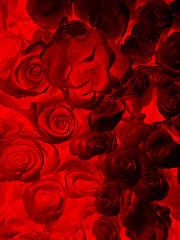

In [13]:
PIL.Image.open(str(roses[4]))

In [14]:
flowers_images_dict= {
    "roses" : list(data_dir.glob('roses/*')),
    "daisy" : list(data_dir.glob('daisy/*')),
    "tulips" : list(data_dir.glob('tulips/*')),
    "dandelion" : list(data_dir.glob('dandelion/*')),
    "sunflowers" : list(data_dir.glob('sunflowers/*')),
}


In [16]:
flowers_labels_dict={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    'tulips':4
}

In [17]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [18]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
img.shape

(240, 179, 3)

In [22]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
X,y = [],[]

for flower_name , images in flowers_images_dict.items():
    # print(flower_name)
    # print(len(images))
    for image in images:
        img = img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])


In [25]:
y[0],X[0]

(0,
 array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8))

In [26]:
X = np.array(X)
y = np.array(y)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [43]:
len(X_train)

2752

In [44]:
len(X_test)

918

In [45]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [32]:
num_classes = len(flowers_labels_dict.keys())
num_classes

5

In [46]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [47]:
X_train = X_train.astype('float')

In [53]:
model.fit(X_train_scaled,y_train,epochs = 5,batch_size=10)

Epoch 1/5
276/276 [==============================] - 70s 252ms/step - loss: 0.0645 - accuracy: 0.9844
Epoch 2/5
276/276 [==============================] - 68s 245ms/step - loss: 0.0266 - accuracy: 0.9927
Epoch 3/5
276/276 [==============================] - 72s 260ms/step - loss: 0.0119 - accuracy: 0.9975
Epoch 4/5
276/276 [==============================] - 64s 231ms/step - loss: 0.0179 - accuracy: 0.9971
Epoch 5/5
276/276 [==============================] - 64s 231ms/step - loss: 0.0049 - accuracy: 0.9993


In [54]:
# X_test = X_test.astype('float')
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 138ms/step - loss: 2.4770 - accuracy: 0.6002


[2.4770374298095703, 0.600217878818512]

In [55]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 4s 143ms/step


array([[  3.859732  ,  13.532986  ,  -4.1781564 ,  -1.130686  ,
         -2.4381912 ],
       [ 16.526175  , -10.528739  , -13.937225  ,  -8.02484   ,
         15.56204   ],
       [  8.217441  ,  -3.8856864 ,  -5.413743  ,  -5.120804  ,
          6.4323955 ],
       ...,
       [  0.797277  ,   4.828591  ,   0.45870933,  -1.4677868 ,
          0.20469251],
       [  2.427868  ,   4.8458986 ,  -2.8293717 ,  -0.24257573,
         -0.8528302 ],
       [ -7.3221946 ,   1.9697188 ,  12.355893  ,  -3.6930478 ,
          3.50174   ]], dtype=float32)

In [56]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.2940700e-05, 9.9993646e-01, 2.0329251e-08, 4.2817450e-07,
       1.1581860e-07], dtype=float32)>

In [57]:
np.argmax(score),y_test[0]

(1, 1)

# data augmentation

In [72]:
data_augmentation_zoom = Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
    
])

In [68]:
data_augmentation_contrast = Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9),
    
])
data_augmentation_rotate = Sequential([
    layers.experimental.preprocessing.RandomRotation(0.9),
    
])

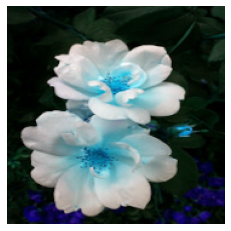

In [58]:
plt.axis('off')
plt.imshow(X[0])

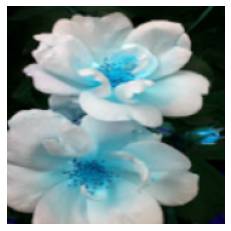

In [73]:
plt.axis('off')
plt.imshow(data_augmentation_zoom(X)[0].numpy().astype("uint8"))

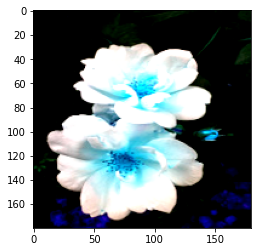

In [71]:
plt.imshow(data_augmentation_contrast(X)[0].numpy().astype("uint8"))

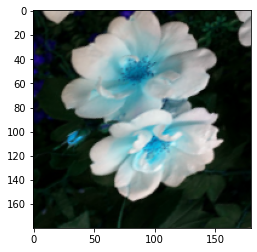

In [70]:
plt.imshow(data_augmentation_rotate(X)[0].numpy().astype("uint8"))

In [74]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

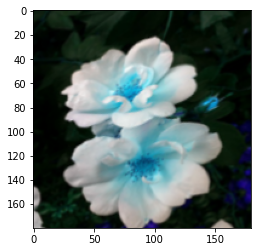

In [77]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [78]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [79]:
model.fit(X_train_scaled,y_train,epochs=5,batch_size=10)

Epoch 1/5
276/276 [==============================] - 82s 275ms/step - loss: 1.2968 - accuracy: 0.4379
Epoch 2/5
276/276 [==============================] - 77s 278ms/step - loss: 1.0027 - accuracy: 0.6039
Epoch 3/5
276/276 [==============================] - 66s 238ms/step - loss: 0.9181 - accuracy: 0.6352
Epoch 4/5
276/276 [==============================] - 67s 242ms/step - loss: 0.8345 - accuracy: 0.6744
Epoch 5/5
276/276 [==============================] - 67s 242ms/step - loss: 0.7815 - accuracy: 0.7078


In [80]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 137ms/step - loss: 0.8221 - accuracy: 0.6852


[0.8221229314804077, 0.6851851940155029]